In [2]:
#imports

import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import re
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('cpu_cooler_csv.csv')

In [5]:
sns.set_style('whitegrid')

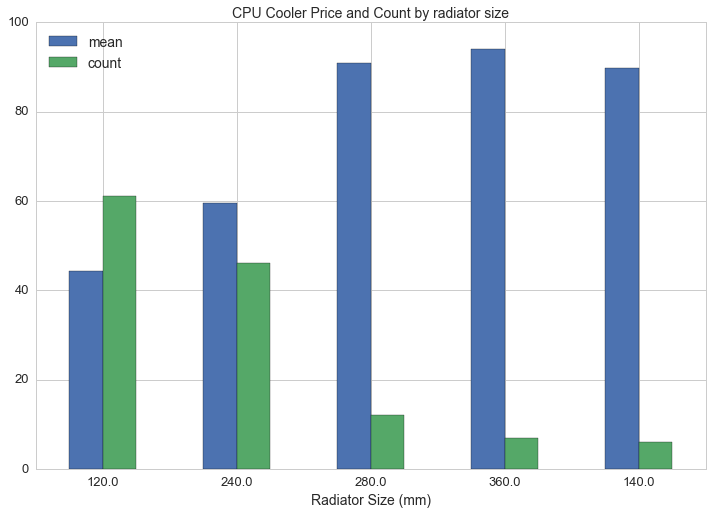

In [20]:
df[df.liquid=="Yes"].groupby('rad_size').avg.agg(['mean', 'count']).sort_values('count', ascending=False).plot(kind='bar', figsize=(12,8), rot=0)
plt.title('CPU Cooler Price and Count by radiator size', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('Radiator Size (mm)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu_cooler/rad_vs_price.png'))

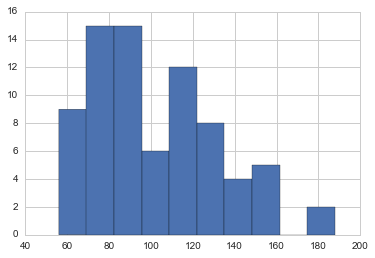

In [46]:
df[(df.avg>0)&(df.liquid=="Yes")].avg.hist()

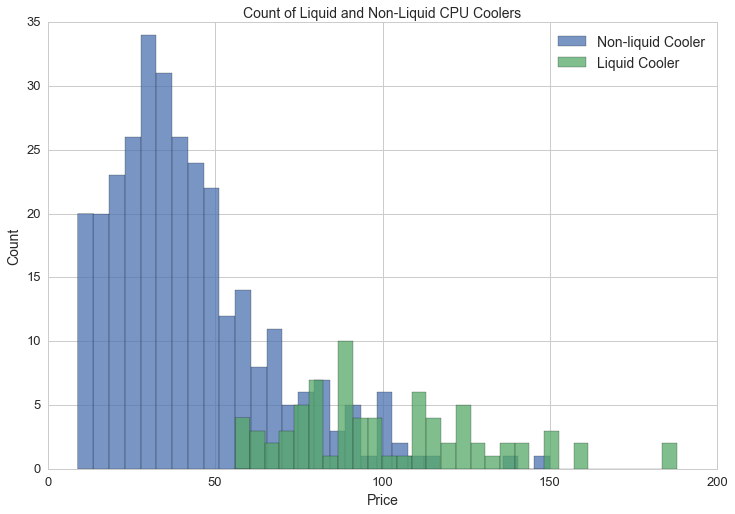

In [10]:
plt.figure(figsize=(12,8))
plt.hist(df[(df.avg>0)&(df.liquid=="No")].avg, bins = 30, alpha=.75, label='Non-liquid Cooler')
df[(df.avg>0)&(df.liquid=="Yes")].avg.hist(bins=30, alpha=.75, label='Liquid Cooler')
plt.legend(loc='upper right', fontsize=14)
plt.title('Count of Liquid and Non-Liquid CPU Coolers', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu_cooler/prices_hist.png'))

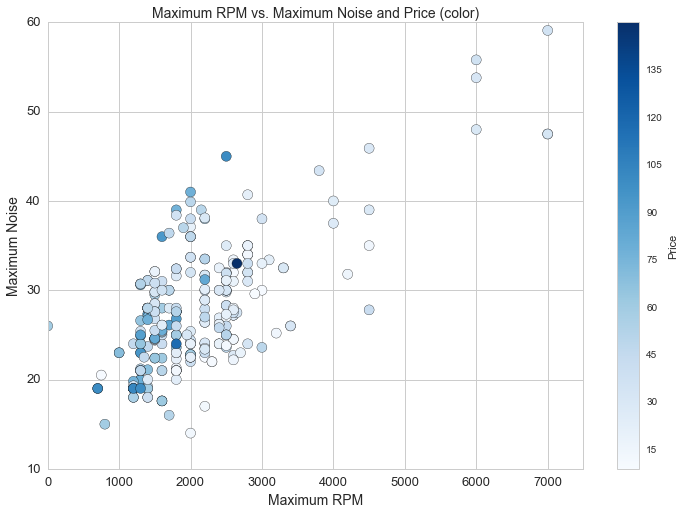

In [22]:
plt.figure(figsize=(12,8))
df1 = df[(df.liquid=='No')&(df.avg>0)]
plt.scatter(df1.rpm_max, df1.max_noise, s=100, c = df1.avg, cmap='Blues')
plt.colorbar(label='Price')
plt.axis([0,7500,10,60])
plt.xlabel('Maximum RPM', fontsize=14)
plt.ylabel('Maximum Noise', fontsize=14)
plt.title('Maximum RPM vs. Maximum Noise and Price (color)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu_cooler/rpm_vs_noise.png'))

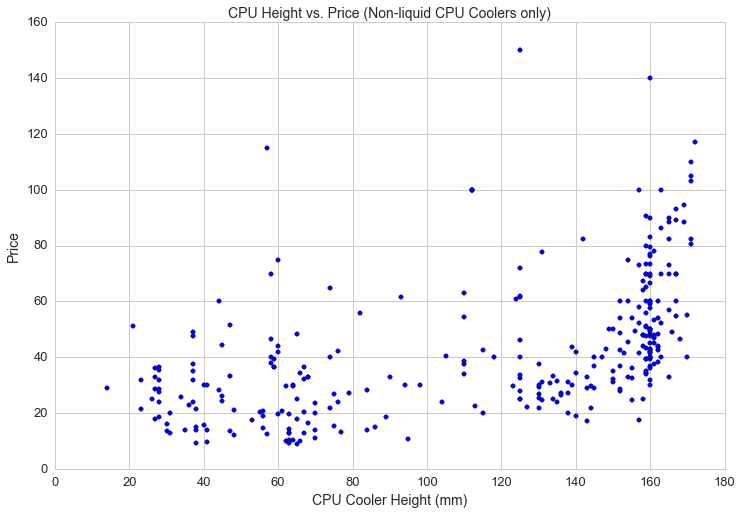

In [21]:
#CPU cooler height
df1 = df[(df.avg>0)&(df.cooler_height>0)]
plt.figure(figsize=(12,8))
plt.scatter(df1.cooler_height, df1.avg)
plt.title('CPU Height vs. Price (Non-liquid CPU Coolers only)', fontsize=14)
plt.xlabel('CPU Cooler Height (mm)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu_cooler/cooler_height.png'))

In [141]:
df = pd.read_csv('cpu_cooler_csv.csv')

In [94]:
count_dict = {x:y for x, y in zip(df['Supported Sockets'].value_counts().index, df['Supported Sockets'].value_counts())}

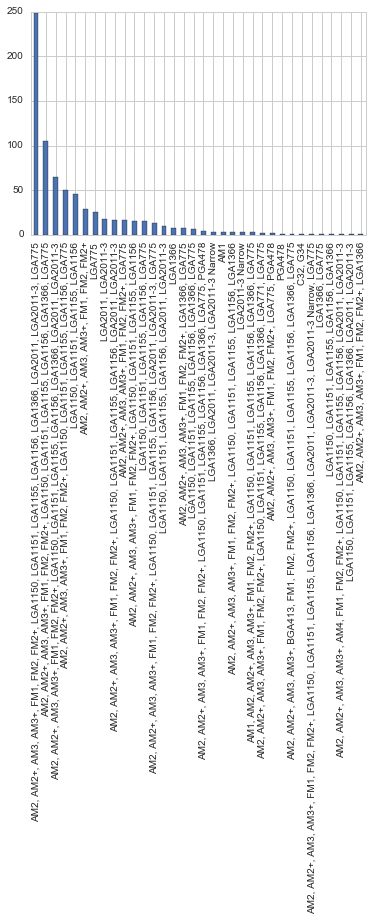

In [87]:
df['Supported Sockets'].value_counts().plot(kind='bar')

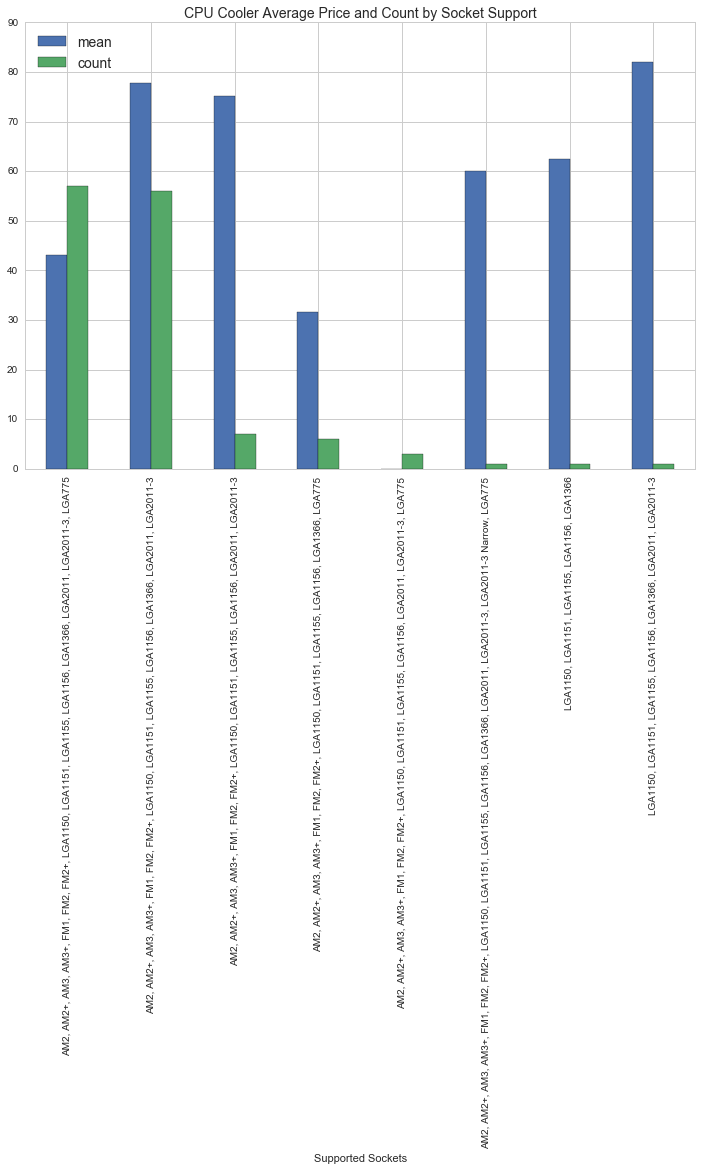

In [156]:
df[df.liquid=='Yes'].groupby('Supported Sockets').avg.agg(['mean', 'count']).sort_values('count', ascending=False).plot(kind='bar', figsize=(12,8))
plt.title('CPU Cooler Average Price and Count by Socket Support', fontsize=14)
plt.xlabel('Supported Sockets')
plt.legend(loc = 'upper left',fontsize=14)

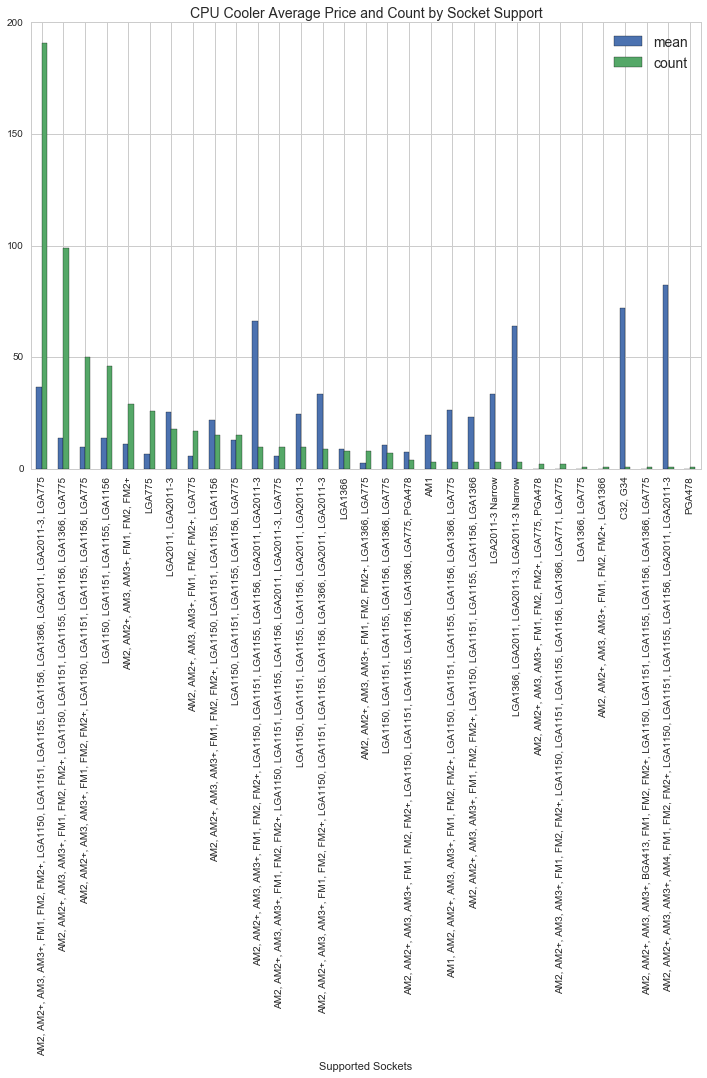

In [153]:
df[df.liquid=='No'].groupby('Supported Sockets').avg.agg(['mean', 'count']).sort_values('count', ascending=False).plot(kind='bar', figsize=(12,8))
plt.title('CPU Cooler Average Price and Count by Socket Support', fontsize=14)
plt.xlabel('Supported Sockets')
plt.legend(fontsize=14)